<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [2]:
# Your code here


### 1.2 NumPy’s PRNG

In [3]:
np.random.rand()                # Give one number

0.5644026669948178

In [4]:
np.random.rand(10)              # Give ten numbers`


array([0.55993452, 0.93780672, 0.76346772, 0.9726385 , 0.9962128 ,
       0.12623645, 0.12155417, 0.72876738, 0.43626849, 0.45615779])

In [5]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.90359318, 0.29763508],
       [0.74274095, 0.69189706],
       [0.34287643, 0.19350135],
       [0.40839251, 0.43441177],
       [0.17508706, 0.67892672]])

In [6]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
sum(random_numbers < .5) / n * 100

50.06

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

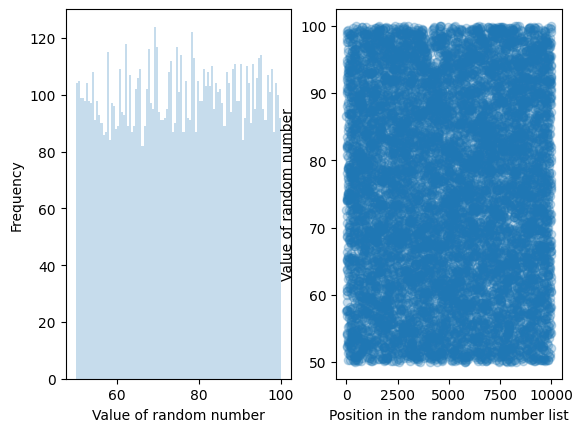

In [7]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

# n = 10000
# random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

In [8]:

# Your code here


### 1.5 ‘seeding’ a PRNG

In [9]:

# Your code here
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([53, 21, 18, 92, 41, 58, 51, 86, 75, 34])

In [10]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([98, 33, 67,  6, 88, 94,  5, 11, 80, 50])

In [11]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [12]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [13]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [14]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [15]:

# Your code here
np.random.choice(['Head', 'Tails'])

'Head'

In [16]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [17]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [18]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [19]:

# Your code here
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

In [20]:

# Your code here
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

In [21]:
heads_probability = heads_counts/no_of_repeats

In [22]:

from scipy.stats import binom
theo_probability = [round(binom.pmf(k=i, n=10, p=.5), 4) for i in range(11)]

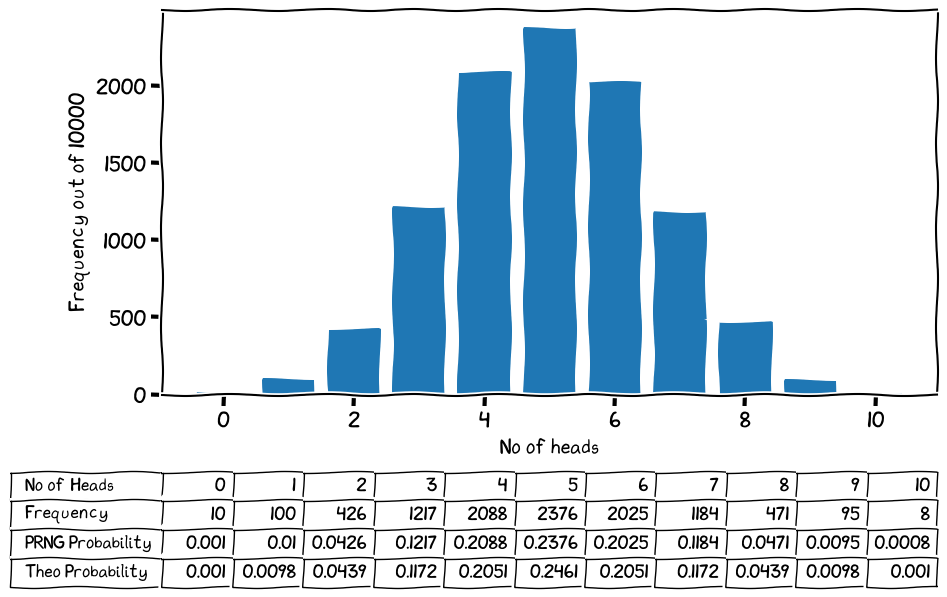

In [23]:
with plt.xkcd():
    plt.rcParams['figure.figsize'] = (10,5)
    plt.bar(no_of_heads, heads_counts)
    plt.xlabel('No of heads')
    plt.ylabel(f'Frequency out of {no_of_repeats}')
    plt.table([no_of_heads, heads_counts, heads_probability, theo_probability],
            rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo Probability'],
            loc='bottom',
            bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C

Mean: 0.2965
Standard Deviation: 0.540543939009587
Probability of 0 C13 atoms: 74.22%


<BarContainer object of 5 artists>

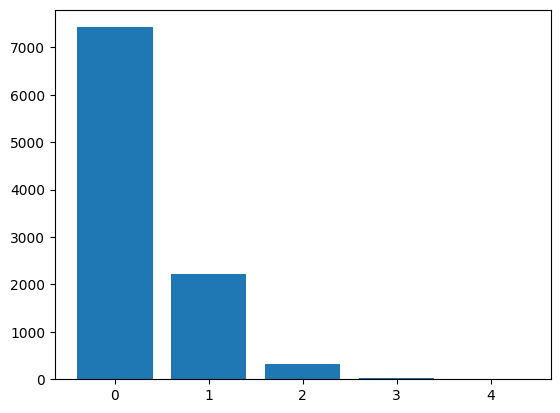

In [42]:
# Probabilistic solution
def no_of_c13(no_of_c, c13_abundance=0.011):
    '''
    Returns the number of carbon-13 atoms in
    a molecule containing no_of_c carbon atoms.
    '''
    results = np.random.rand(no_of_c)
    no_of_c13 = np.sum(results < c13_abundance)
    return no_of_c13

dataset_size = 10000
cholesterol_dataset = np.array([no_of_c13(27) for _ in range(dataset_size)])
mean_c_cholesterol = np.mean(cholesterol_dataset)
sd_c_cholesterol = np.std(cholesterol_dataset)
prob_0_c13_cholesterol = np.sum(cholesterol_dataset == 0) / dataset_size * 100

print(f"Mean: {mean_c_cholesterol}\nStandard Deviation: {sd_c_cholesterol}\nProbability of 0 C13 atoms: {prob_0_c13_cholesterol}%")

no_of_c13, counts = np.unique(cholesterol_dataset, return_counts = True)
plt.bar(no_of_c13, counts)